In [1]:
# File: notebooks/01_lsm_implementation.ipynb

# First, we need to add our 'src' folder to the Python path
# This allows us to import our custom modules
import sys
sys.path.append('../src')

# Import the necessary libraries and our function
import lsm_pricer
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# --- Set Simulation Parameters (from Gustaffson's paper for consistency) ---
S0 = 100.0     # Initial price [cite: 200]
K = 100.0      # Strike price [cite: 406]
r = 0.03       # Risk-free rate [cite: 405]
sigma = 0.15   # Volatility [cite: 404]
T = 1.0        # Time to maturity in years [cite: 407]
N_steps = 100  # Number of time steps
N_paths = 10   # Number of paths to simulate for visualization

# --- Run the Simulation ---
stock_paths = lsm_pricer.simulate_gbm_paths(S0, r, sigma, T, N_steps, N_paths)

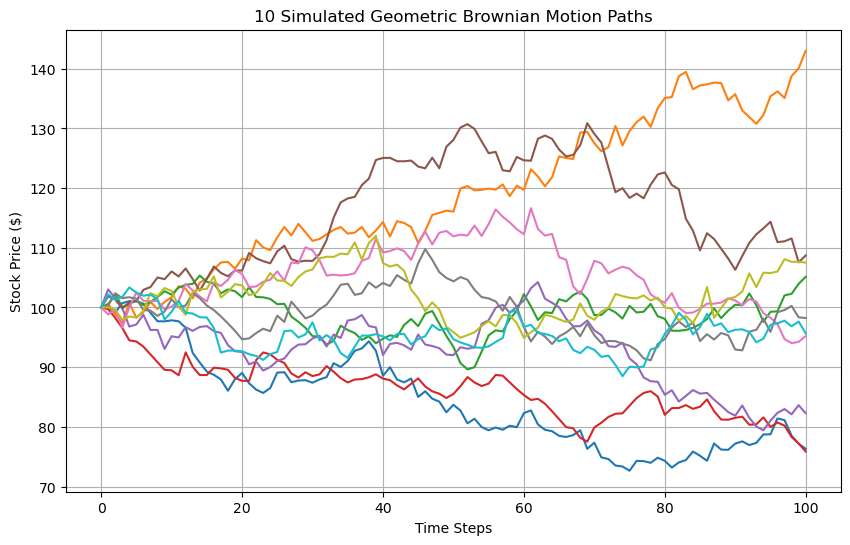

In [3]:
# --- Visualize the Results ---
plt.figure(figsize=(10, 6))
plt.plot(stock_paths)
plt.title(f'{N_paths} Simulated Geometric Brownian Motion Paths')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price ($)')
plt.grid(True)
plt.show()

In [4]:
# --- Set Parameters for Validation (from Gustaffson's Table 3.1) ---
S0 = 100.0
K = 100.0
r = 0.03       # [cite: 405]
sigma = 0.15   # [cite: 404]
T = 1.0        # [cite: 407]
N_steps = 100  # A reasonable number of steps for accuracy
N_paths = 100000 # Use a large number of paths for a stable estimate
basis_degree = 3 # Let's start with 3 basis functions

# --- Run a fresh simulation with these parameters ---
print("Running simulation...")
stock_paths_for_pricing = lsm_pricer.simulate_gbm_paths(S0, r, sigma, T, N_steps, N_paths)
print("Simulation complete.")

# --- Price the American Put Option ---
print("Pricing the option...")
option_price = lsm_pricer.price_american_option(
    stock_paths=stock_paths_for_pricing,
    K=K,
    r=r,
    T=T,
    basis_degree=basis_degree,
    option_type='put'
)
print("Pricing complete.")

Running simulation...
Simulation complete.
Pricing the option...
Pricing complete.


In [5]:
# --- Compare with Gustaffson's Result ---
gustaffson_value = 4.820608
print(f"\nYour Calculated Option Price: {option_price:.6f}")
print(f"Gustaffson's Benchmark Value: {gustaffson_value:.6f} [cite: 411]")
print(f"Difference: {abs(option_price - gustaffson_value):.6f}")


Your Calculated Option Price: 4.814741
Gustaffson's Benchmark Value: 4.820608 [cite: 411]
Difference: 0.005867
